In [34]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf

import scipy.stats as stats

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import shapely.geometry as sg
from shapely.geometry import Point

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import ART_preprocessing as ART_pre

import warnings
warnings.filterwarnings('ignore')

In [9]:
data_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite')

In [10]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'Veneto_DEM_500.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [120]:
data_dir = os.path.join(data_base,'5_DOWN','ITALY_DOWN_IMERG_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')
DATA = xr.open_dataset(data_dir)

lons, lats = DATA.lon.values, DATA.lat.values
lon2d, lat2d = np.meshgrid(lons, lats)

BETA = DATA.BETA.values
GAMMA = DATA.GAMMA.values

Ns = DATA.NYs.values
Cs = DATA.CYs.values
Ws = DATA.WYs.values

Nd = DATA.NYd.values
Cd = DATA.CYd.values
Wd = DATA.WYd.values

In [79]:
beta_min, beta_max = np.min(BETA), np.max(BETA)
print(f'Beta min: {beta_min}, Beta max: {beta_max}')

gamma_min, gamma_max = np.min(GAMMA), np.max(GAMMA)
print(f'Gamma min: {gamma_min}, Gamma max: {gamma_max}')

Beta min: 0.7340485422528896, Beta max: 0.9946039503138071
Gamma min: 0.928030743295145, Gamma max: 0.9809635408335892


In [ ]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.55, 18.95, 36.5, 47.95, 'ITALY', 0.002

data_dir = os.path.join(data_base,'IMERG', '1dy','IMERG_Italy_1dy_2000_06_01_2024_02_29.nc')
DATA = xr.open_dataset(data_dir)
PRE_data = DATA.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

PRE = PRE_data.PRE.values

## ENSEMBLE QUANTILES

In [123]:
data_dir = os.path.join(data_base,'5_DOWN','ITALY_ENSEMBLE_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')
DATA = xr.open_dataset(data_dir)

lons, lats = DATA.lon.values, DATA.lat.values
lon2d, lat2d = np.meshgrid(lons, lats)

Mev_s = DATA.Mev_s.values
Mev_d = DATA.Mev_d.values

## SATELLITE DATA

In [119]:
PRE_cmap = plt.cm.Spectral_r
PRE_levels = np.arange(1,56,1)
proj = ccrs.PlateCarree()

for nn in range(15):
    time_pre = nn*2
    fig = plt.figure(figsize=(4,4),dpi=300)
    gs = gridspec.GridSpec(1,1)

    ax1 = plt.subplot(gs[0, 0], projection = proj)
    ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
    ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
    ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

    a1 = ax1.contourf(lon2d, lat2d, PRE[time_pre,:,:], cmap=PRE_cmap, levels=PRE_levels, extend='max')

    ax1.set_facecolor('white')
    fig.patch.set_alpha(0)
    plt.close()

    salida = os.path.join('..','figures','Article_down',f'PRE_{str(time_pre).zfill(3)}.png')
    print(f'Export figure to: {salida}')
    # plt.savefig(salida,transparent = False,bbox_inches='tight',pad_inches = 0, facecolor=None)

Export figure to: ../figures/Article_down/PRE_000.png
Export figure to: ../figures/Article_down/PRE_002.png
Export figure to: ../figures/Article_down/PRE_004.png
Export figure to: ../figures/Article_down/PRE_006.png
Export figure to: ../figures/Article_down/PRE_008.png
Export figure to: ../figures/Article_down/PRE_010.png
Export figure to: ../figures/Article_down/PRE_012.png
Export figure to: ../figures/Article_down/PRE_014.png
Export figure to: ../figures/Article_down/PRE_016.png
Export figure to: ../figures/Article_down/PRE_018.png
Export figure to: ../figures/Article_down/PRE_020.png
Export figure to: ../figures/Article_down/PRE_022.png
Export figure to: ../figures/Article_down/PRE_024.png
Export figure to: ../figures/Article_down/PRE_026.png
Export figure to: ../figures/Article_down/PRE_028.png


## BETA and GAMMA

Export figure to: ../figures/Article_down/BETA.png


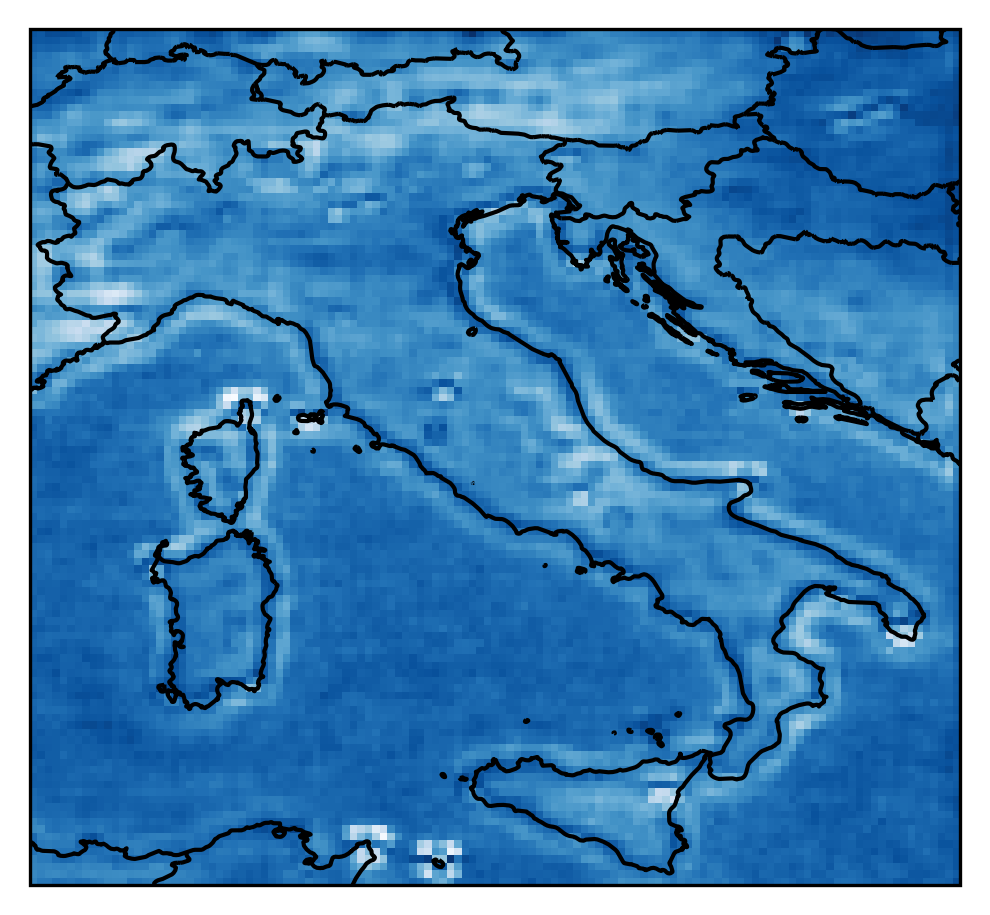

In [55]:
cmap_beta = plt.cm.Blues
cmap_gamma = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, BETA, cmap=cmap_beta)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.043)
# cbar.ax.tick_params(labelsize=5)

# ax1.set_title(f'(a) BETA', fontsize=7, loc='left')
# ax1.set_title(f'ERA 5', fontsize=7, loc='right')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','BETA.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/GAMMA.png


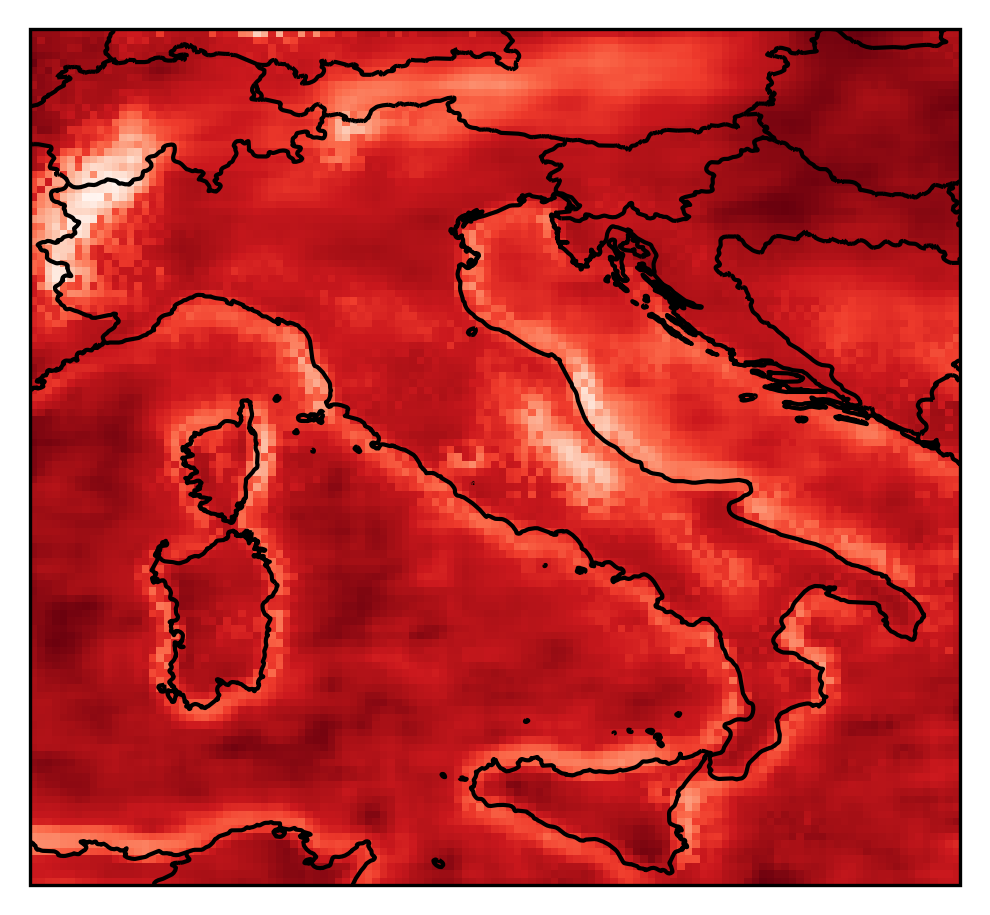

In [56]:
cmap_beta = plt.cm.Blues
cmap_gamma = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, GAMMA, cmap=cmap_gamma)

# cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.043)
# cbar.ax.tick_params(labelsize=5)

# ax1.set_title(f'(b) GAMMA', fontsize=7, loc='left')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','GAMMA.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [61]:
N_min = np.min([np.nanmin(np.nanmean(Ns,axis=0)), np.nanmin(np.nanmean(Nd,axis=0))])
N_max = np.max([np.nanmax(np.nanmean(Ns,axis=0)), np.nanmax(np.nanmean(Nd,axis=0))])
print(f'NY min: {N_min}, NY max: {N_max}')

NY min: 59.27272727272727, NY max: 235.77272727272728


In [62]:
C_min = np.min([np.nanmin(np.nanmean(Cs,axis=0)), np.nanmin(np.nanmean(Cd,axis=0))])
C_max = np.max([np.nanmax(np.nanmean(Cs,axis=0)), np.nanmax(np.nanmean(Cd,axis=0))])
print(f'NY min: {C_min}, NY max: {C_max}')

NY min: 2.293387794602628, NY max: 12.485781011771548


In [63]:
W_min = np.min([np.nanmin(np.nanmean(Ws,axis=0)), np.nanmin(np.nanmean(Wd,axis=0))])
W_max = np.max([np.nanmax(np.nanmean(Ws,axis=0)), np.nanmax(np.nanmean(Wd,axis=0))])
print(f'NY min: {W_min}, NY max: {W_max}')

NY min: 0.5535335253025755, NY max: 0.8747051385508885


In [64]:
N_level = np.arange(80,210,10)
N_norm = mcolors.BoundaryNorm(boundaries=N_level, ncolors=256)

C_level = np.arange(4,12,1)
C_norm = mcolors.BoundaryNorm(boundaries=C_level, ncolors=256)

W_level = np.arange(0.5,1.05,0.05)
W_norm = mcolors.BoundaryNorm(boundaries=W_level, ncolors=256)

## Ns, Cs and Ws

Export figure to: ../figures/Article_down/Ns.png


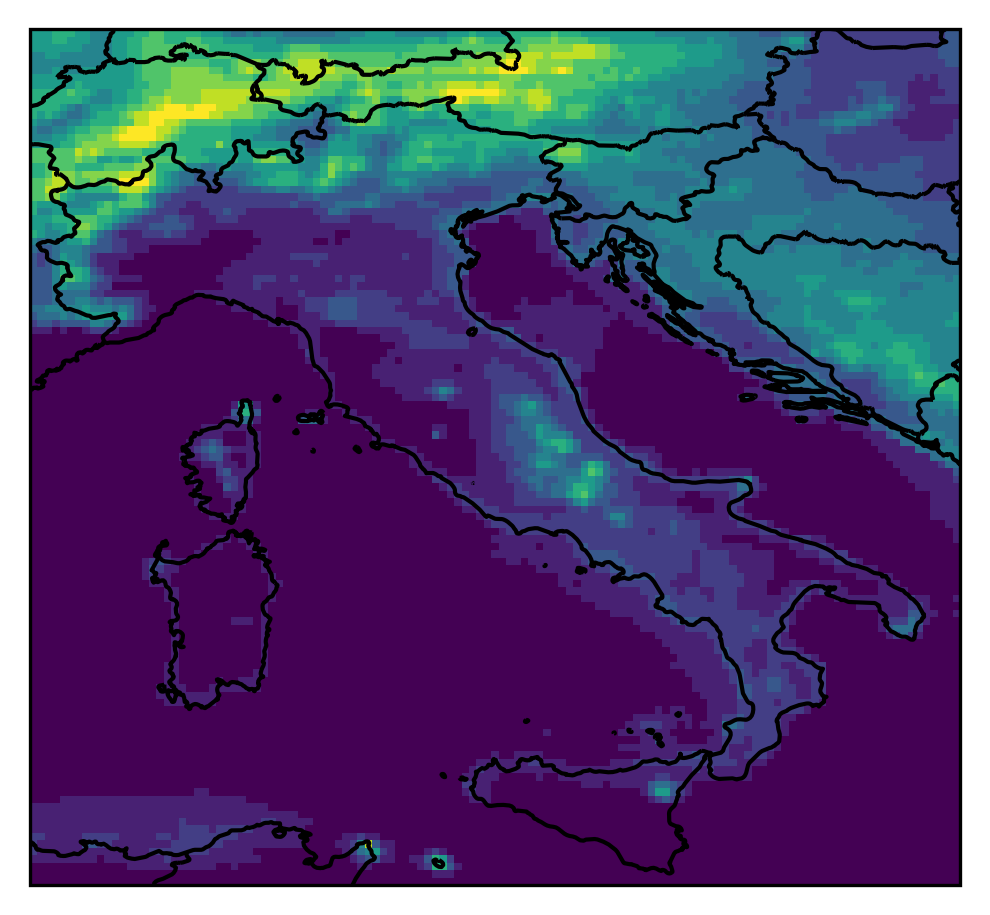

In [68]:
cmap_beta = plt.cm.Blues
cmap_gamma = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Ns,axis=0), norm=N_norm)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Ns.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/Cs.png


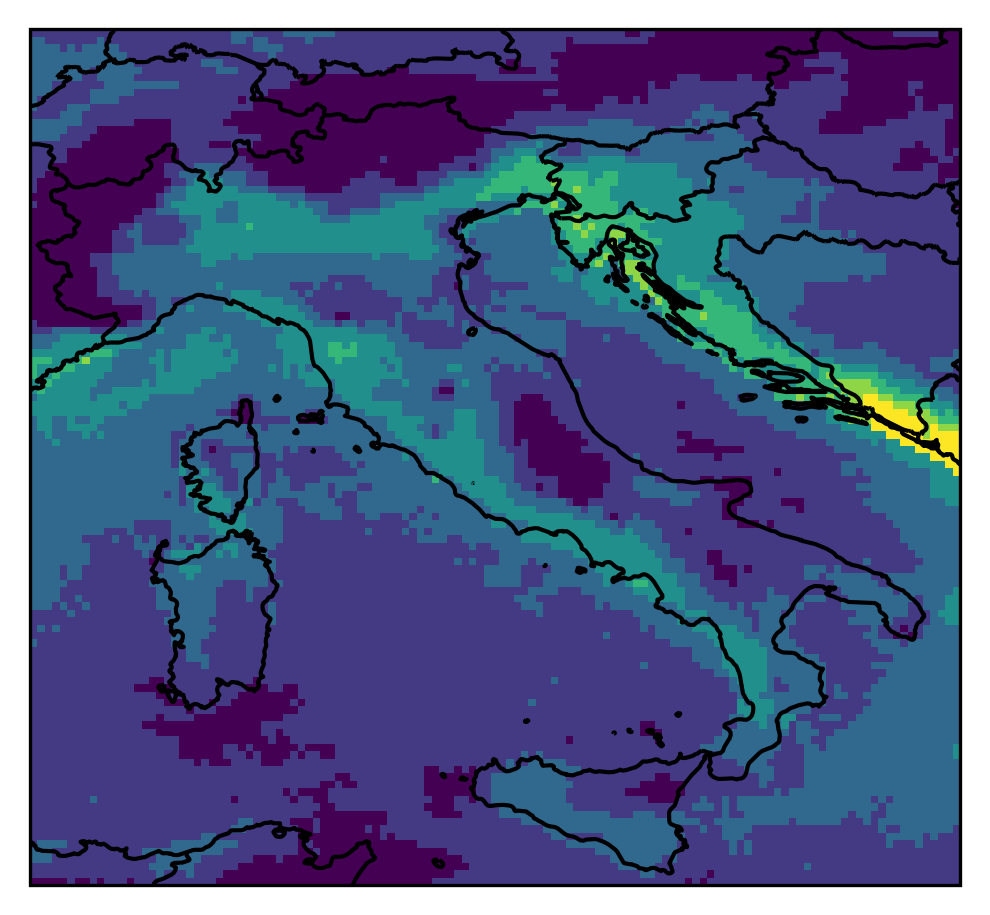

In [70]:
cmap_beta = plt.cm.Blues
cmap_gamma = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Cs,axis=0), norm=C_norm)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Cs.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/Ws.png


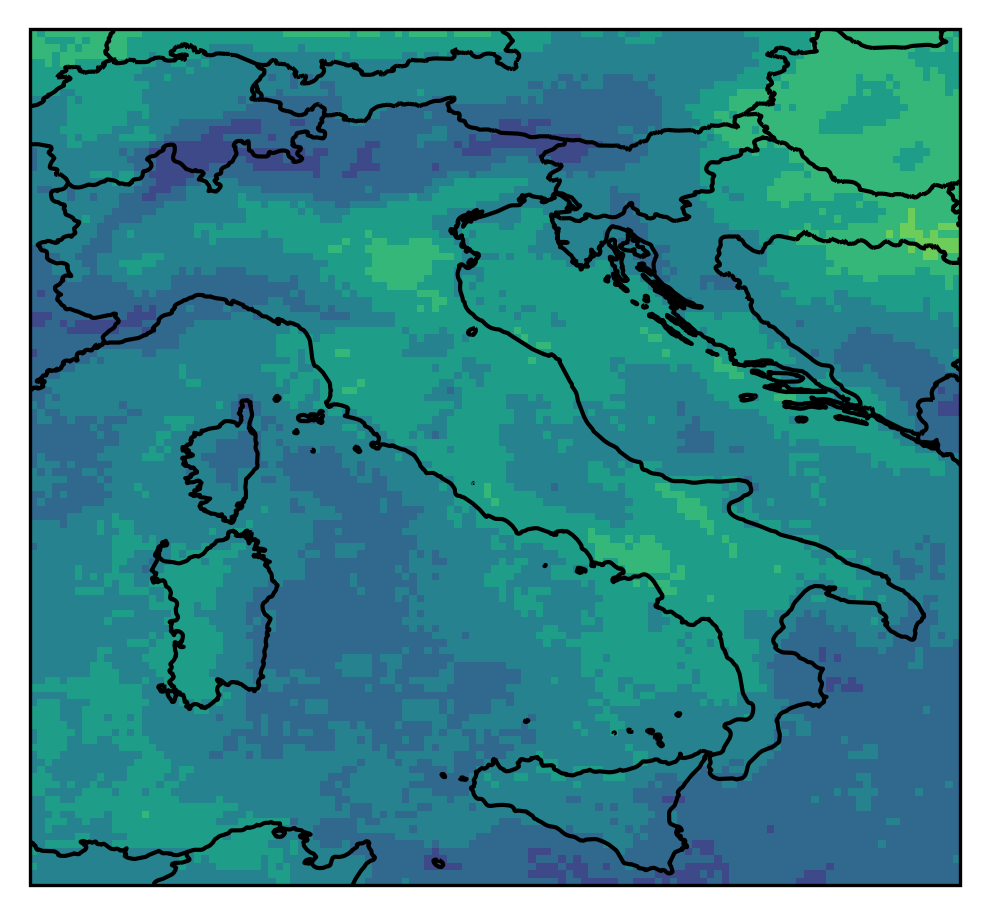

In [71]:
cmap_beta = plt.cm.Blues
cmap_gamma = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Ws,axis=0), norm=W_norm)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Ws.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Nd, Cd and Wd

Export figure to: ../figures/Article_down/Nd.png


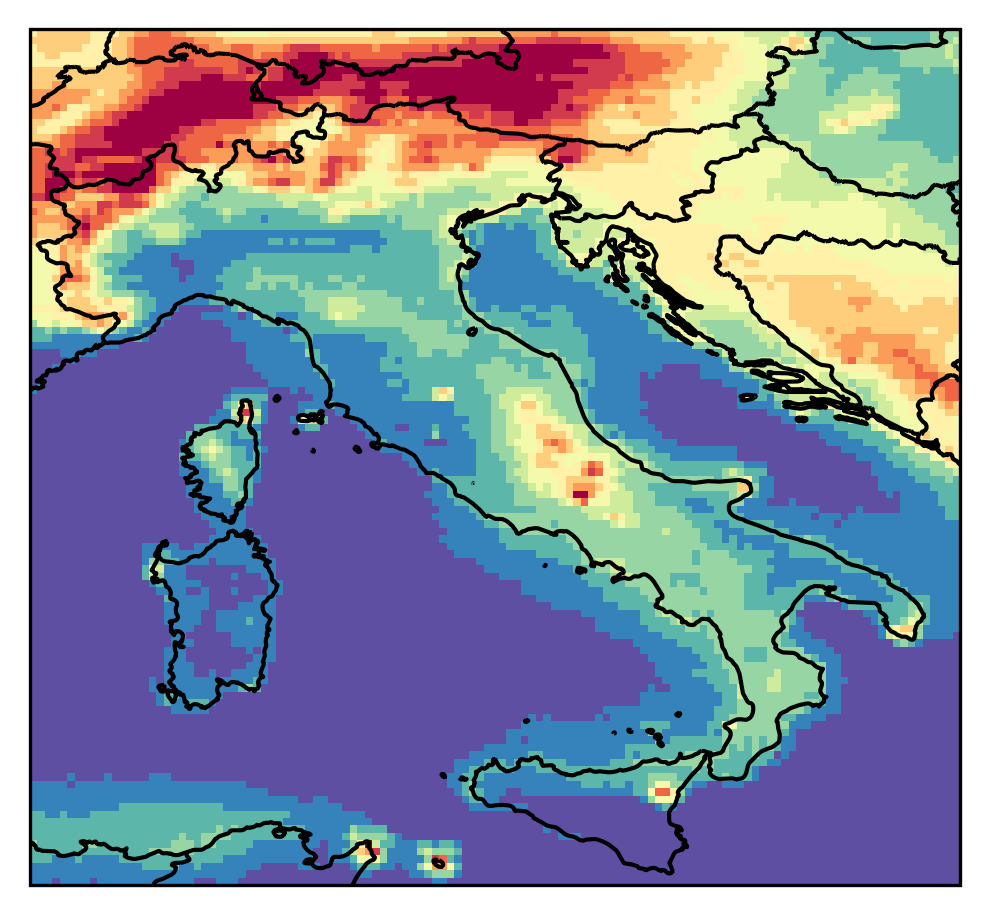

In [73]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Nd,axis=0), norm=N_norm, cmap=cmap)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Nd.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/Cd.png


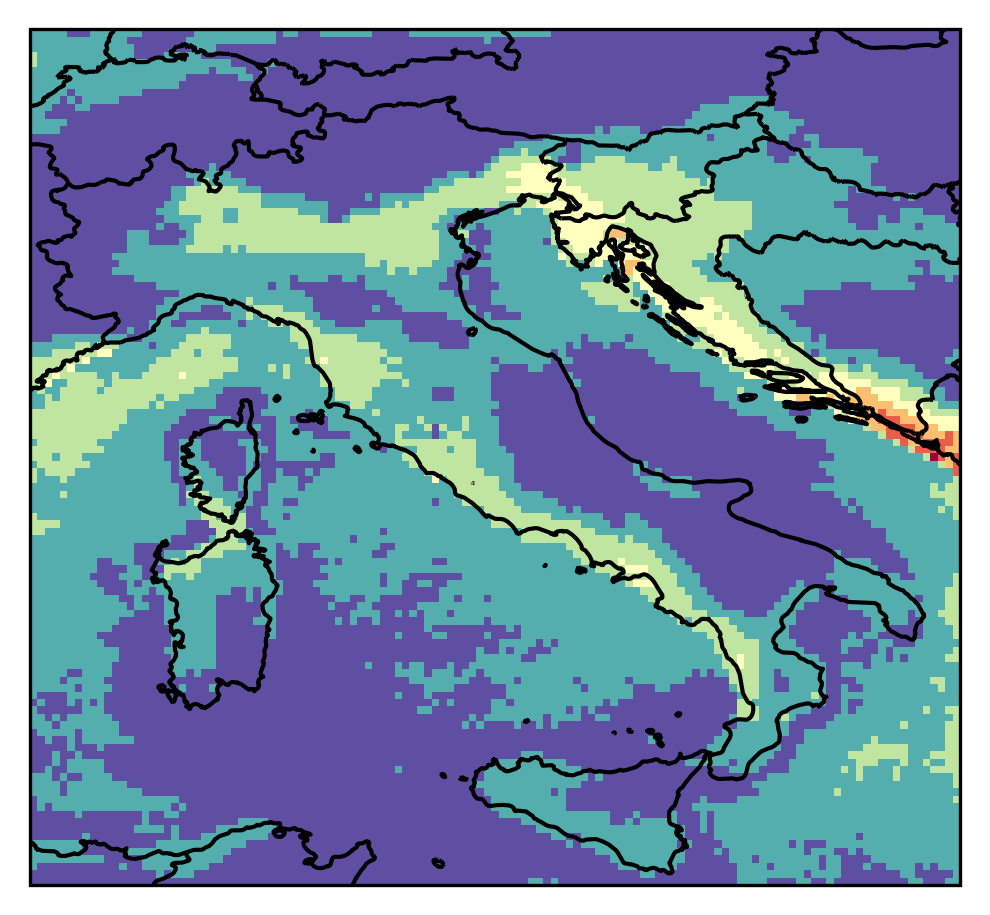

In [74]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Cd,axis=0), norm=C_norm, cmap=cmap)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Cd.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/Wd.png


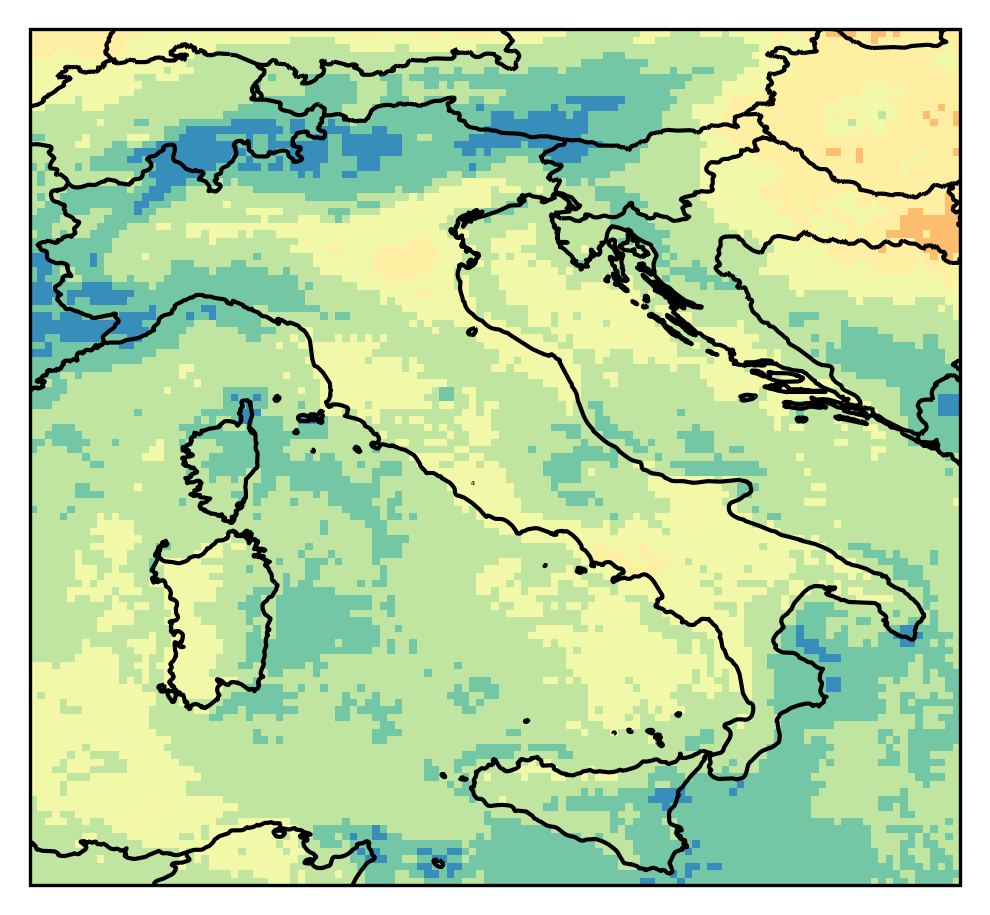

In [75]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Wd,axis=0), norm=W_norm, cmap=cmap)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Wd.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## ENSEMBLE EXTREME QUANTILES

In [129]:
Q_min = np.min([np.min(Mev_d[1,:,:]), np.min(Mev_d[2,:,:]), np.min(Mev_d[3,:,:])])
Q_max = np.max([np.max(Mev_d[1,:,:]), np.max(Mev_d[2,:,:]), np.max(Mev_d[3,:,:])])
print(f'Q min: {Q_min}, Q max: {Q_max}')

Q_level = np.arange(45,200,5)
Q_norm = mcolors.BoundaryNorm(boundaries=Q_level, ncolors=256)

Q min: 49.770463538988125, Q max: 355.69225318615145


Export figure to: ../figures/Article_down/Mev_s.png


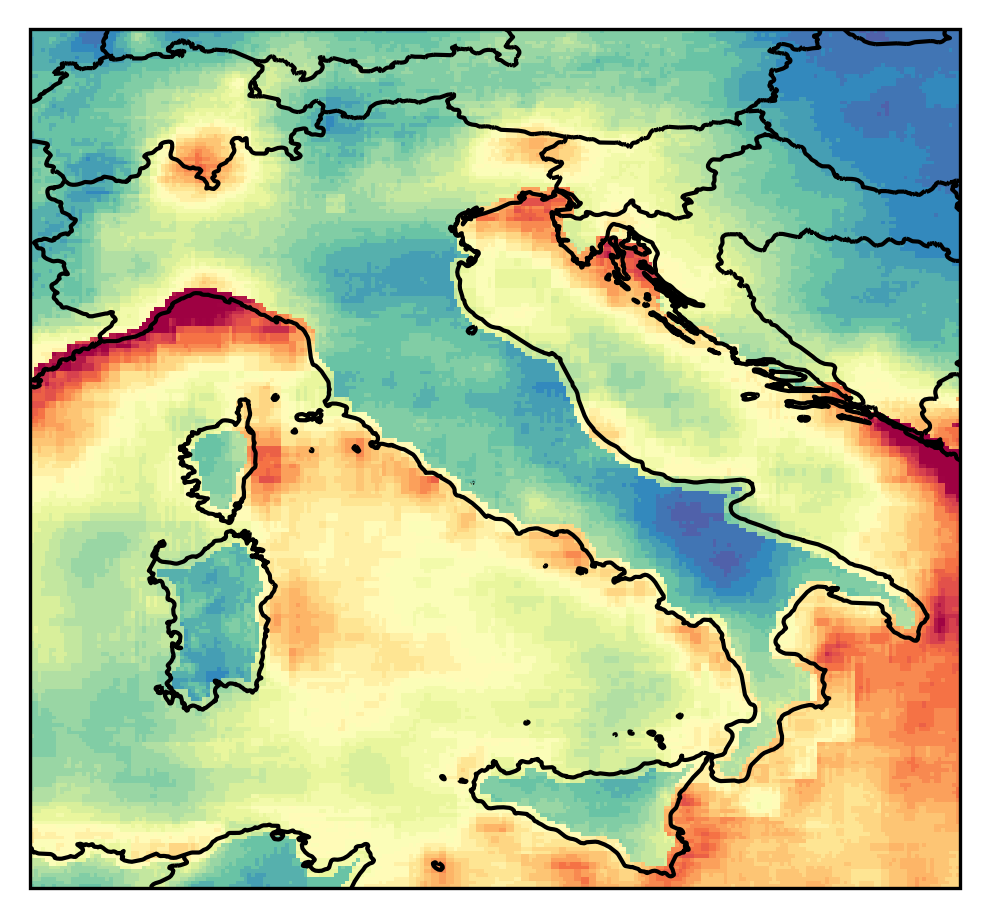

In [132]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_s[2,:,:], norm=Q_norm, cmap=cmap)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Mev_s.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/Mev_d.png


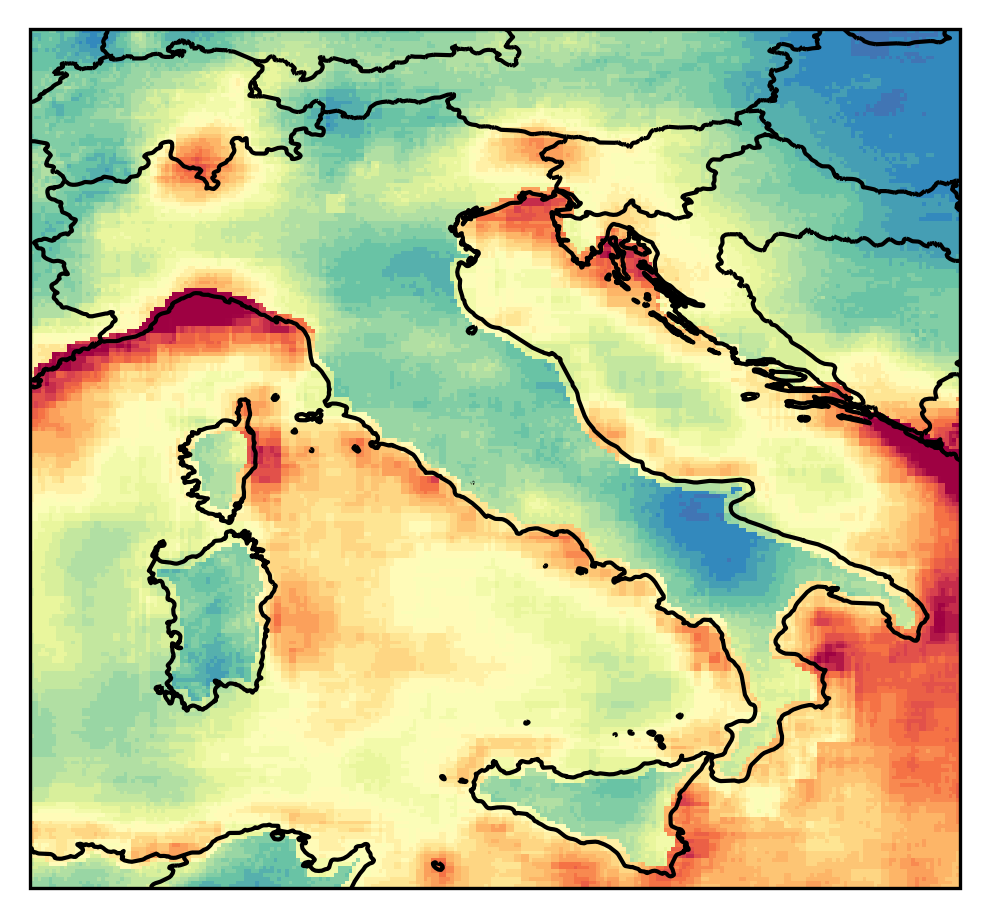

In [133]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=1,color='k')
ax1.add_feature(cf.BORDERS,linewidth=1,color='k')

a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d[2,:,:], norm=Q_norm, cmap=cmap)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

salida = os.path.join('..','figures','Article_down','Mev_d.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Q min: 49.770463538988125, Q max: 355.69225318615145


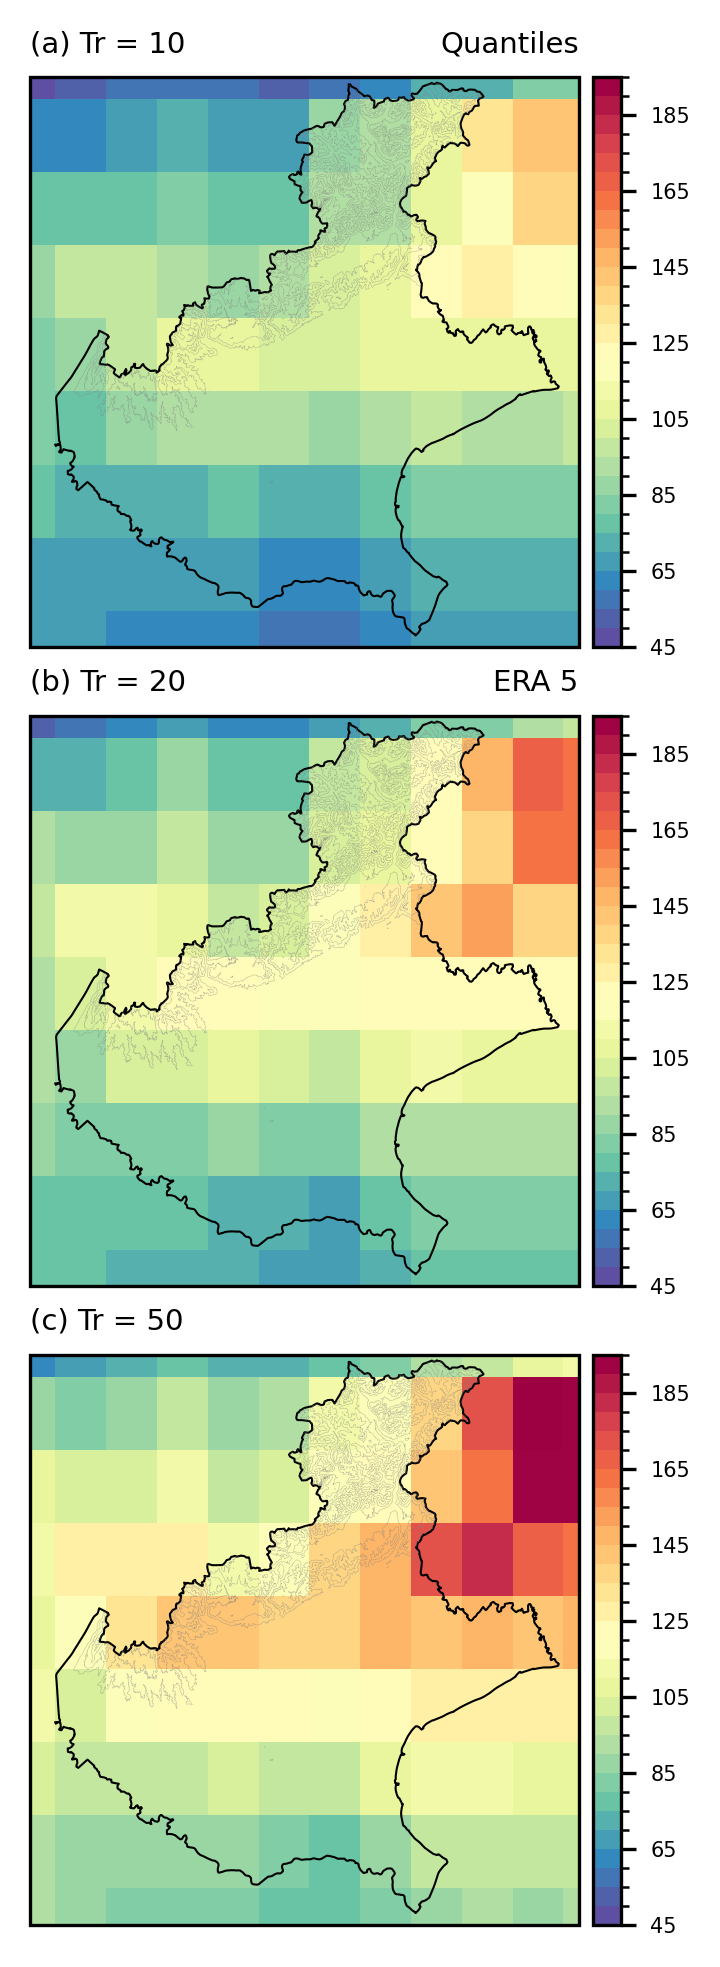

In [20]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(3,8),dpi=300)
gs = gridspec.GridSpec(3,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_s[1,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) Tr = {Tr[1]}', fontsize=7, loc='left')
ax1.set_title(f'Quantiles', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_s[2,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) Tr = {Tr[2]}', fontsize=7, loc='left')
ax1.set_title(f'ERA 5', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_s[3,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) Tr = {Tr[3]}', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.15, hspace=0.12)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

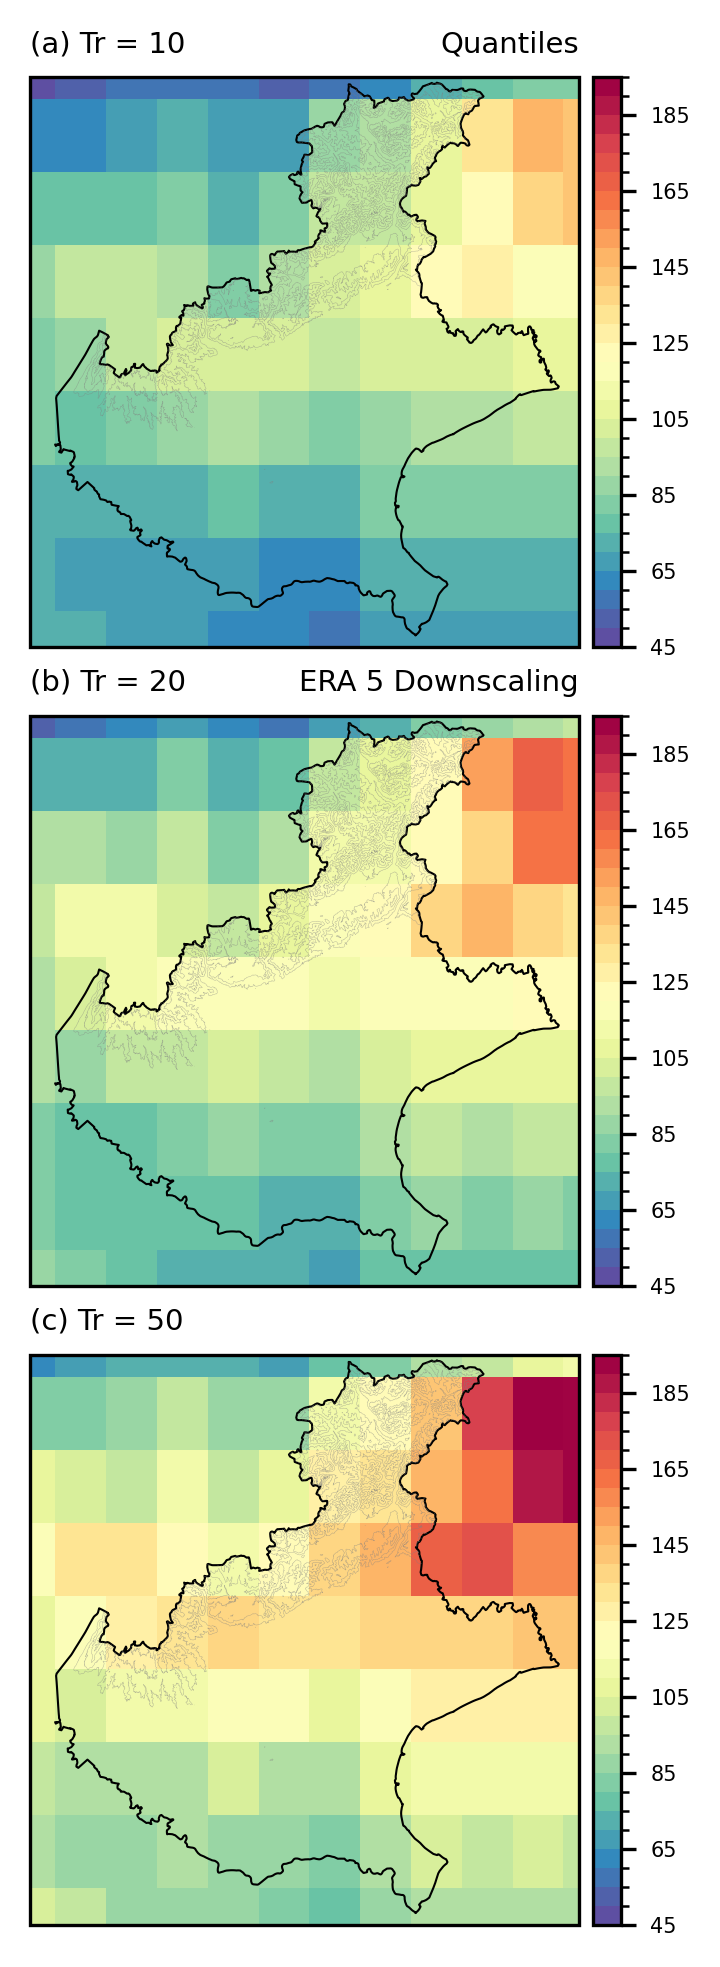

In [19]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(3,8),dpi=300)
gs = gridspec.GridSpec(3,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_d[1,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) Tr = {Tr[1]}', fontsize=7, loc='left')
ax1.set_title(f'Quantiles', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_d[2,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) Tr = {Tr[2]}', fontsize=7, loc='left')
ax1.set_title(f'ERA 5 Downscaling', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_d[3,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) Tr = {Tr[3]}', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.15, hspace=0.12)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)